# 데이터 직무에 따른 연봉 분석

> **목표:**
- 경력레벨, 고용 형태, 근무 모델 등이 연봉에 미치는 영향 분석
- 직원 거주 지역과 회사 위치가 연봉 차이에 미치는 영향 조사
- 회사 규모가 연봉에 미치는 영향 평가
- 연도별 연봉 변화 추세 분석
- 직무별 연봉 차이 및 연관된 기술/역량 분석

> **데이터**

* 데이터 명세 ⬇

| Column              | Description                    |
|:--------------------|:-------------------------------|
| job_title           | 직업명 혹은 직책                |
| experience_level    | 경력                            |
| employment_type     | 고용형태                        | 
| work_models         | 근무형태(대면/비대면)           |
| work_year           | 기록된 급여를 받은 연도         |
| emplopyee_residence | 근로자 거주지                   |
| salary              | 급여자 거주국 통화로 기록된 급여 |
| salary_currency     | 급여가 표시되는 통화            |
| salary_in_usd       | 달러로 환산한 급여              |
| company_location    | 회사 위치                      |
| company_size        | 회사 규모(대/중/소)             |



> **예상 결과**
- 경력 레벨, 근무 형태, 근무 모델 등의 다양한 요인들이 연봉에 미치는 구체적인 영향력 파악
- 지역별 연봉 차이와 이에 영향을 미치는 요인들 식별
- 연도별 연봉 변화의 추세와 패턴 도출
- 직무별 연봉 차이와 특정 기술 또는 역량이 연봉에 미치는 영향 분석

> **기대효과**
- 이 프로젝트를 통해 얻은 인사이트는 구직자가 더 정보에 기반한 직업 선택을 할 수 있게 하고, 기업은 인재 유치 및 유지 전략을 개선하는 데 도움을 줄 것으로 예상.
또한, 업계 전반의 연봉 투명성을 증진시키고, 공정한 연봉 책정 기준 마련에 기여할 수 있을 것으로 기대. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.options.display.float_format = '{:,.3f}'.format

### 전처리

In [3]:
df = pd.read_csv('./data_science_salaries.csv')
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [4]:
df.shape

(6599, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [6]:
df.isnull().sum()

# 결측치 없음

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe()

# salary MAX값이 이상치 아닌지 의심

,work_year,salary,salary_in_usd
count,"6,599.000","6,599.000","6,599.000"
mean,"2,022.818","179,283.255","145,560.559"
std,0.675,"526,372.242","70,946.838"
min,"2,020.000","14,000.000","15,000.000"
25%,"2,023.000","96,000.000","95,000.000"
50%,"2,023.000","140,000.000","138,666.000"
75%,"2,023.000","187,500.000","185,000.000"
max,"2,024.000","30,400,000.000","750,000.000"


In [8]:
df.sort_values(by= 'salary_in_usd',ascending=False).head(10)
# 상위 아홉명만 70만 달러 이상의 급여를 받음. 이상치로 판단-제거.

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
1540,Data Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
296,Machine Learning Scientist,Mid-level,Full-time,On-site,2024,United States,750000,USD,750000,United States,Medium
1611,Data Scientist,Senior-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
848,Machine Learning Scientist,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
852,Machine Learning Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
329,Research Scientist,Mid-level,Full-time,On-site,2024,United States,720000,USD,720000,United States,Medium
321,Research Engineer,Mid-level,Full-time,On-site,2024,United States,720000,USD,720000,United States,Medium
1509,Analytics Engineer,Mid-level,Full-time,Remote,2023,United States,700000,USD,700000,United States,Medium
1095,Analytics Engineer,Senior-level,Full-time,Remote,2023,United States,700000,USD,700000,United States,Medium
1354,Data Engineer,Executive-level,Full-time,On-site,2023,United States,465000,USD,465000,United States,Medium


In [9]:
df = df[df['salary_in_usd']<600000]

## EDA

- 직업별 급여 비교

In [10]:
# 단순 직업별 급여 비교 

job_title = df['job_title'].unique()
job_tile_tot_sal = df.groupby('job_title')['salary'].sum().sort_values(ascending=False)

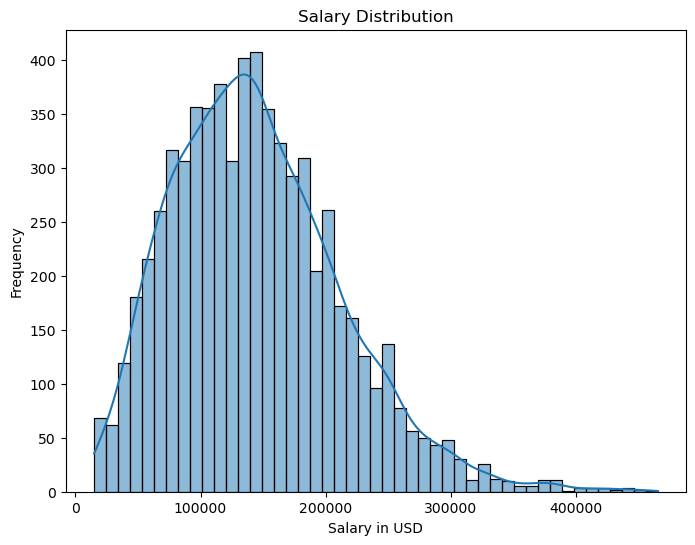

In [11]:
# 연속 변수의 분포를 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


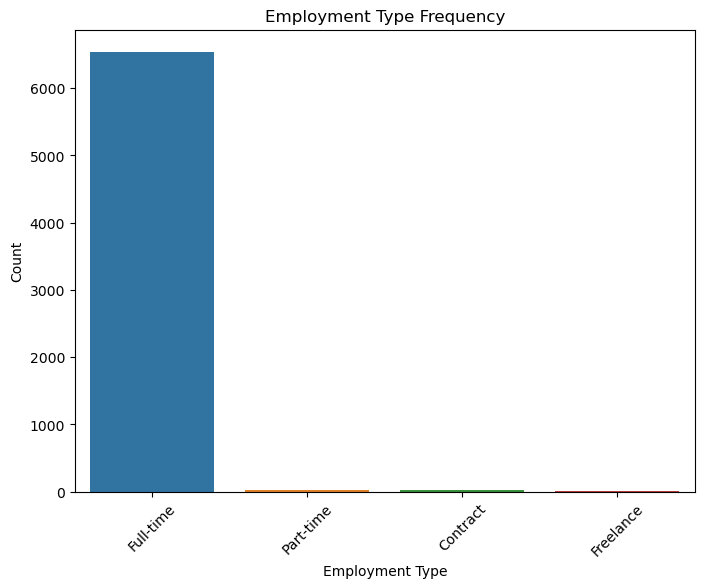

In [12]:
# 범주형 변수의 빈도수를 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_type', data=df)
plt.title('Employment Type Frequency')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# full-time 근무자의 응답비율이 절대다수임을 확인

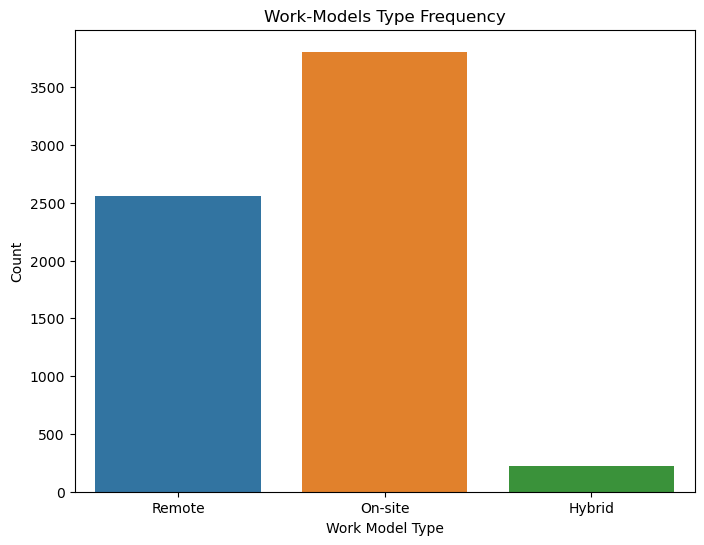

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='work_models',data=df)
plt.title('Work-Models Type Frequency')
plt.xlabel('Work Model Type')
plt.ylabel('Count')
plt.show()
#혼합형태의 근무는 숫자가 거의 없음. 

In [14]:
# 연속 변수 간의 상관 관계를 확인
# 버전의 문제인지 char값은 correlation 을 구할 수 없어서 정수로 치환단계 거침

df['experience_level'].unique()
df_corr = df.copy()
# EDA를 위해 숫자형으로 치환 필요(entry =1 ~ executive = 4)

In [15]:
df_corr['experience_level'] = df_corr['experience_level'].replace({
    'Entry-level': 1
    ,'Mid-level':2
    ,'Senior-level':3
    ,'Executive-level':4
})

In [16]:
df_corr['employment_type'].unique()
# employment_type 1->full-time, 2->part-time, 3->Contract, 4->Freelance 

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [17]:
df_corr['employment_type'] = df_corr['employment_type'].replace({
    'Full-time': 1
    ,'Part-time':2
    ,'Contract':3
    ,'Freelance':4
})

In [18]:
df_corr['work_models'].unique()
# Remote -> 1 , On-site -> 2, Hybrid -> 3

array(['Remote', 'On-site', 'Hybrid'], dtype=object)

In [19]:
df_corr['work_models'] = df_corr['work_models'].replace({
    'Remote': 1
    ,'On-site':2
    ,'Hybrid':3
})

In [20]:
df_corr['employee_residence'].unique()
# 너무 많은 유니크가 존재

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Uganda', 'Italy', 'Thailand',
       'Philippines', 'Tunisia', 'Belgium', 'Turkey', 'Nigeria',
       'Uzbekistan', 'Argentina', 'France', 'Kuwait', 'Ukraine',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Armenia', 'Russia', 'Georgia', 'Qatar', 'Peru', 'Poland',
       'New Zealand', 'Norway', 'Netherlands', 'Mexico', 'Latvia',
       'Pakistan', 'Lithuania', 'South Korea', 'Kenya', 'Moldova',
       'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece', 'Ghana',
       'Finland', 'Estonia', 'Cyprus', 'Ecuador', 'Austria', 'Colombia',
       'Switzerland', 'Central African Republic', 'Czech Republic',
       'Brazil', 'Bosnia and Herzegovina', 'Andorra', 'China',
       'Costa Rica', 'Chile', 'Bolivia', 'Malaysia',
       'United Arab Emirates', 'Puerto Rico', 'Japan', 'Iran',
 

In [21]:
df_corr['company_size'].unique()
# small -> 1 , mediun -> 2, large -> 3

array(['Medium', 'Large', 'Small'], dtype=object)

In [22]:
df_corr['company_size'] = df_corr['company_size'].replace({
    'Small': 1
    ,'Medium':2
    ,'Large':3
})

In [23]:
# job_title, employee_residence, salary, salary_currency는 유니크 개수가 많고, 일부는 상관관계에 무의미하다고 판단. 
df_corr.drop(['job_title','employee_residence','salary','salary_currency','company_location'], axis=1,inplace=True)

In [24]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6590 entries, 0 to 6598
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   experience_level  6590 non-null   int64
 1   employment_type   6590 non-null   int64
 2   work_models       6590 non-null   int64
 3   work_year         6590 non-null   int64
 4   salary_in_usd     6590 non-null   int64
 5   company_size      6590 non-null   int64
dtypes: int64(6)
memory usage: 360.4 KB


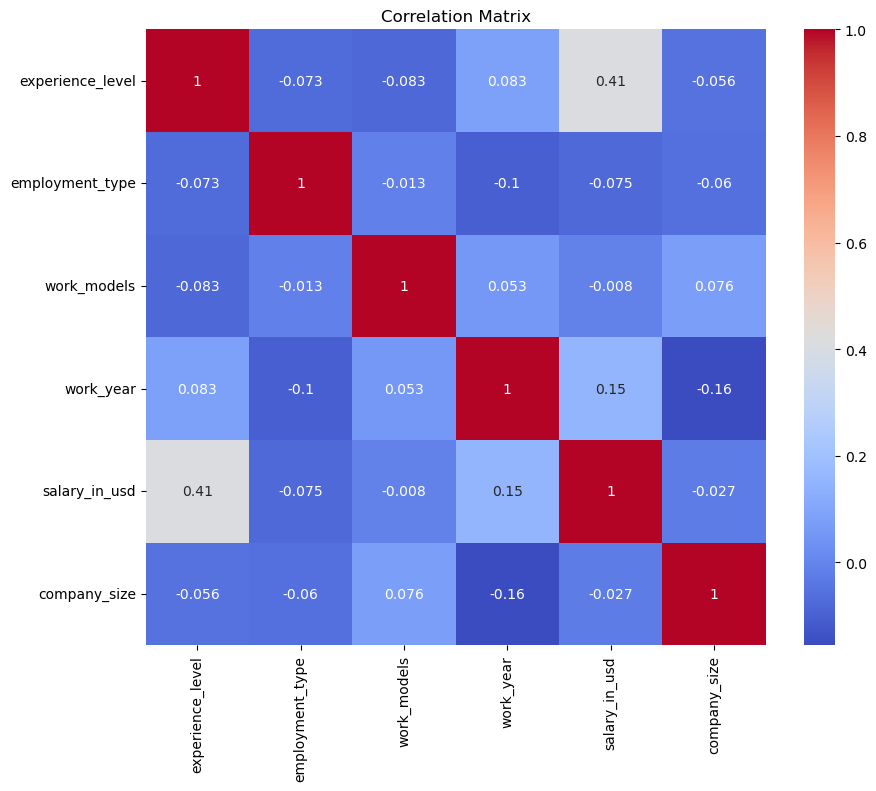

In [25]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# 급여와 가장 상관관계에 있는것은 experience_level이다. 


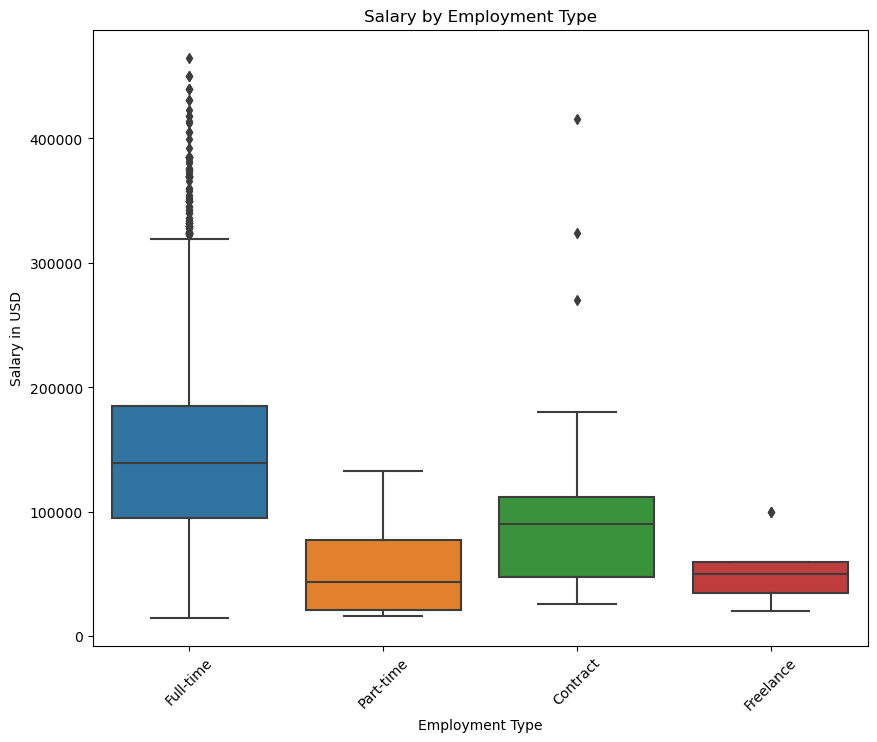

In [26]:
# 범주형 변수와 연속 변수 사이의 관계를 확인
plt.figure(figsize=(10, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()
# 70만 달러 이상은 이상치로 판단

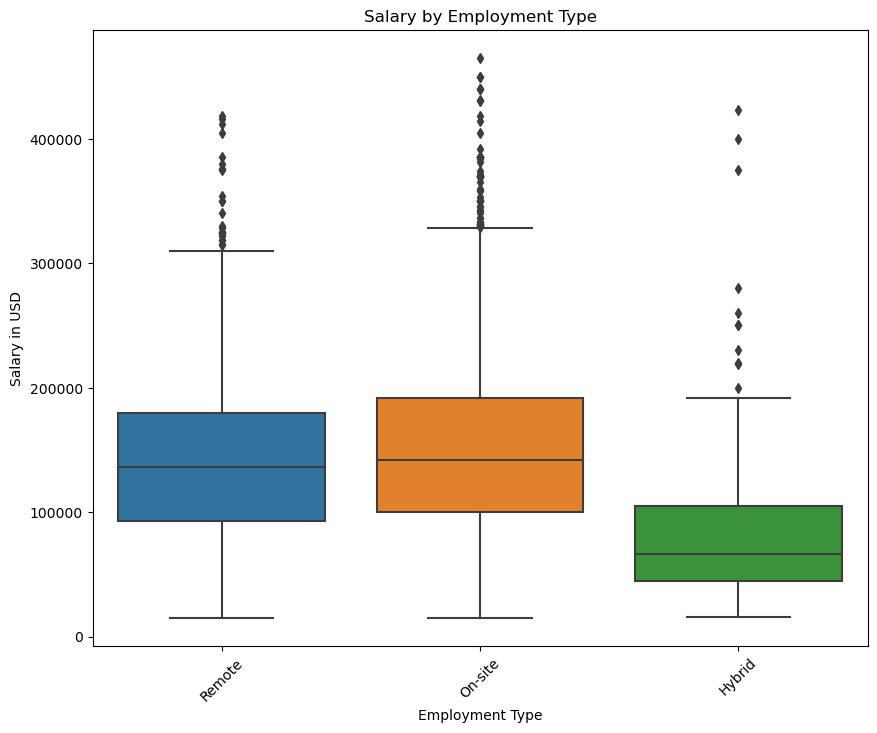

In [49]:

plt.figure(figsize=(10, 8))
sns.boxplot(x='work_models', y='salary_in_usd', data=df)
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


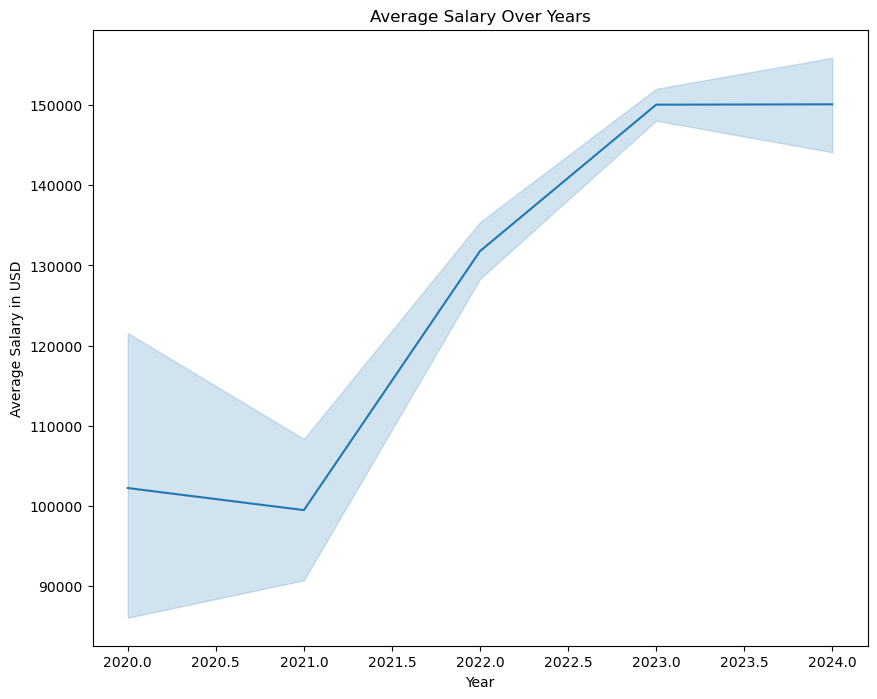

In [27]:
# 연도별 평균 연봉의 변화를 시각화
plt.figure(figsize=(10, 8))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator=np.mean)
plt.title('Average Salary Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.show()
# 21~23년도 사이에 데이터직군 연봉의 급상승을 확인

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6590 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6590 non-null   object
 1   experience_level    6590 non-null   object
 2   employment_type     6590 non-null   object
 3   work_models         6590 non-null   object
 4   work_year           6590 non-null   int64 
 5   employee_residence  6590 non-null   object
 6   salary              6590 non-null   int64 
 7   salary_currency     6590 non-null   object
 8   salary_in_usd       6590 non-null   int64 
 9   company_location    6590 non-null   object
 10  company_size        6590 non-null   object
dtypes: int64(3), object(8)
memory usage: 617.8+ KB


In [29]:
# 급여의 합계가 높은 직업 top10 확인
df.groupby('job_title').sum('salary_in_usd').sort_values(by='salary_in_usd',ascending=False).head(10)

,work_year,salary,salary_in_usd
job_title,,,
Data Engineer,2641755,200043179,188163388
Data Scientist,2512281,263337729,184502557
Machine Learning Engineer,1270383,118547864,110725436
Data Analyst,1840782,101495030,97307837
Analytics Engineer,493583,36729304,37058862
Research Scientist,414694,36336655,36376898
Data Architect,356028,28820777,28799604
Research Engineer,273119,29659209,24267241
ML Engineer,228579,37810195,22399228


In [30]:
# 조사한 직업군의 분포가 비슷한지 확인이 필요(차이가 큼)
df['job_title'].value_counts().head(10)
# 불균형을 확인

job_title
Data Engineer                1306
Data Scientist               1242
Data Analyst                  910
Machine Learning Engineer     628
Analytics Engineer            244
Research Scientist            205
Data Architect                176
Research Engineer             135
ML Engineer                   113
Applied Scientist              97
Name: count, dtype: int64

In [31]:
# 평균 급여가 높은 직업 확인 
top10_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top10_job


job_title
Analytics Engineering Manager    399,880.000
Data Science Tech Lead           375,000.000
Managing Director Data Science   280,000.000
AWS Data Architect               258,000.000
Cloud Data Architect             250,000.000
AI Architect                     232,058.600
Director of Data Science         213,454.387
Data Infrastructure Engineer     201,375.417
Data Science Director            201,000.000
ML Engineer                      198,223.257
Name: salary_in_usd, dtype: float64

In [32]:
# 나라별 급여 관계 확인
df['employee_residence'].value_counts().head()

employee_residence
United States     5296
United Kingdom     401
Canada             241
Germany             71
India               70
Name: count, dtype: int64

In [33]:
df['company_location'].value_counts().head()
# 절대다수의 국적 및 회사가 미국에 있는 것을 확인. 
# 인도 국적의 데이터 업종 종사자가 많음을 확인. 
# 하지만 위의 자료들은 절대적 지표가 될 수 없는것이, 미국서 실시한 조사이기에 신빙성이 많이 떨어짐. 

company_location
United States     5345
United Kingdom     408
Canada             243
Germany             78
Spain               63
Name: count, dtype: int64

In [34]:
df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

company_location
Qatar                    300,000.000
Israel                   217,332.000
Puerto Rico              167,500.000
United States            156,104.654
New Zealand              151,634.333
Canada                   139,832.753
Saudi Arabia             134,999.000
Ukraine                  121,333.333
Bosnia and Herzegovina   120,000.000
Australia                114,673.406
Name: salary_in_usd, dtype: float64

In [35]:
df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
# 평균 값 또한 모집단이 적으니 신빙성을 확보할 수 없음.

employee_residence
Israel                   417,937.000
Qatar                    300,000.000
Malaysia                 200,000.000
Puerto Rico              166,000.000
United States            156,804.737
New Zealand              151,634.333
Canada                   140,564.884
Saudi Arabia             134,999.000
China                    125,404.000
Bosnia and Herzegovina   120,000.000
Name: salary_in_usd, dtype: float64

> EDA 분석
- 직책과 급여에 유의미한 상관관계가 존재
- 풀타임 근무자들의 급여가 가장 높음
- 피고용자의 국적과, 기업의 국적은 데이터의 불균형으로 인해 급여와의 관계파악이 어려움
- 직업군에 따른 급여 또한 데이터가 적기에 신뢰성이 부족함

## 통계 분석

#### 경력에 따른 연봉차이 분석(회귀분석)

In [36]:
experience_levels = {
    'Entry-level': 1,
    'Mid-level': 2,
    'Senior-level': 3,
    'Executive-level': 4
}
df['experience_level_numeric'] = df['experience_level'].replace(experience_levels)

C:\Users\user\AppData\Local\Temp\ipykernel_22804\92081641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience_level_numeric'] = df['experience_level'].replace(experience_levels)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 독립변수(X)와 종속변수(y) 설정
X = df[['experience_level_numeric']]  # 독립변수는 2D 배열 형태여야 함
y = df['salary_in_usd']

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# , random_state=0)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'mae_train: {mae_train}')
print(f'r2_train: {r2_train}')
print('')
print(f'mae_test: {mae_test}')
print(f'r2_test: {r2_test}')

y_pred = model.predict(X_test)
print('')
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

mae_train: 48343.692753428615
r2_train: 0.16349624962742815

mae_test: 46907.51324220395
r2_test: 0.17927693619262253

Coefficient:  [39548.33658639]
Intercept:  41865.304269323315


In [38]:
# 예측 모델로서 적합하지 못함을 확인. 데이터의 수가 부족한것으로 판단. 

df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,15000,"200,058.651","-185,058.651"
1,173000,"120,961.977","52,038.023"
2,85000,"120,961.977","-35,961.977"
3,193200,"160,510.314","32,689.686"
4,172386,"120,961.977","51,424.023"


#### 고용 형태와 급여

In [40]:
import pandas as pd
from scipy import stats

# 고용 형태별로 급여 데이터 분류
groups = df.groupby('employment_type')['salary_in_usd'].apply(list)

# ANOVA 분석 수행
anova_result = stats.f_oneway(*groups)

# 결과 출력
print("ANOVA 결과:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# P-value 해석
if anova_result.pvalue < 0.05:
    print("유의미한 차이가 있습니다. (고용 형태에 따른 급여 차이가 통계적으로 유의미함)")
else:
    print("유의미한 차이가 없습니다. (고용 형태에 따른 급여 차이가 통계적으로 유의미하지 않음)")


ANOVA 결과:
F-value: 18.19520519453403
P-value: 9.380302347731634e-12
유의미한 차이가 있습니다. (고용 형태에 따른 급여 차이가 통계적으로 유의미함)


One-way ANOVA는 세 개 이상의 독립된 그룹 간의 평균이 통계적으로 유의미한 차이가 있는지를 검정하는 방법입니다. 이 방법은 각 그룹의 데이터가 정규 분포를 따르고, 동일한 분산을 가지며, 독립적인 관측값으로부터 얻어진 경우에 유효합니다.

반환 값
함수는 F-value와 P-value를 포함하는 반환 값(결과 객체)을 제공합니다:

- F-value (F 통계량): F-value는 그룹 간 평균 차이의 크기를 나타내는 값입니다. 큰 F-value는 그룹 간 평균 차이가 더 클 가능성을 의미합니다. F-value는 그룹 간 변동성과 그룹 내 변동성의 비율로 계산됩니다. 변동성이 클수록 그룹 간에 유의미한 차이가 있다고 간주됩니다.
- P-value: P-value는 관측된 데이터 또는 더 극단적인 데이터가 귀무 가설 하에서 얻어질 확률입니다. 귀무 가설은 모든 그룹의 평균이 동일하다는 가설입니다. 일반적으로, P-value가 0.05 미만이면 귀무 가설을 기각하고 그룹 간에 통계적으로 유의미한 차이가 있다고 결론 내립니다.
> 해석
- F-value가 크고 P-value가 0.05 미만인 경우: 그룹 간에 통계적으로 유의미한 평균 차이가 있음을 의미합니다. 즉, 적어도 하나의 그룹은 다른 그룹과 평균이 다르다고 할 수 있습니다.
- P-value가 0.05 이상인 경우: 그룹 간에 통계적으로 유의미한 평균 차이가 없다는 것을 의미합니다. 즉, 모든 그룹의 평균이 같다는 귀무 가설을 기각할 충분한 근거가 없습니다.
- ANOVA는 그룹 간 평균의 차이가 유의미한지만을 알려줄 뿐, 어떤 그룹 간에 차이가 있는지는 구체적으로 알려주지 않습니다. 그룹 간 구체적인 차이를 알아보기 위해서는 사후 검정(post-hoc test)을 수행해야 합니다.

#### 근무 모델에 따른 급여 차이

In [42]:
# 고용 형태별로 급여 데이터 분류
groups = df.groupby('work_models')['salary_in_usd'].apply(list)

# ANOVA 분석 수행
anova_result = stats.f_oneway(*groups)

# 결과 출력
print("ANOVA 결과:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# P-value 해석
if anova_result.pvalue < 0.05:
    print("유의미한 차이가 있습니다. (근무 형태에 따른 급여 차이가 통계적으로 유의미함)")
else:
    print("유의미한 차이가 없습니다. (근무 형태에 따른 급여 차이가 통계적으로 유의미하지 않음)")

ANOVA 결과:
F-value: 122.44524754599323
P-value: 6.128813774863704e-53
유의미한 차이가 있습니다. (고용 형태에 따른 급여 차이가 통계적으로 유의미함)


#### 연도별 급여의 변화

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
X = df[['work_year']]
y = df['salary_in_usd']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 연도별 연봉 추세를 나타내는 회귀선 예측
X_predict = np.array([[min(df['work_year'])], [max(df['work_year'])]])
y_predict = model.predict(X_predict)


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# , random_state=0)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# 모델 성능 평가
print(f'mae_train: {mae_train}')
print(f'r2_train: {r2_train}')
print('')
print(f'mae_test: {mae_test}')
print(f'r2_test: {r2_test}')
print('')
y_pred = model.predict(X)
print(f"R-squared: {r2_score(y, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")

mae_train: 52252.85697976643
r2_train: 0.023325680018721706

mae_test: 54735.881984352454
r2_test: 0.02231234603330967

R-squared: 0.02
RMSE: 66773.02


### 분석모델
> ANOVA: 근무모델과 고용형태는 급여와 연관이 있음.
- EDA결과와 같이 비교해 보면, 풀타임 근무자이며 대면 근무를 하는 고용인의 급여가 높음을 알 수 있음
--------------------------------------------------------------------------------------------
> 회귀분석:
- 직책과 연도별 예측 모델의 신뢰도는 상당히 낮아 예측의 의미가 없다고 판단.
- 대신 EDA결과 직책이 높아질수록 급여가 상승함을 알 수 있음
- 코로나 시기에 급격한 급여 상승이 있었음을 알 수 있음